# Part I - (summer_Olympic_1896-2014)
## by (Raied AboHejji)

## Introduction
> **Introduce the dataset**: <br>
Olympic sports and medals at summer games.The dataset consist of 31165 rows and 9 columns (Year , City, Sport, Discipline, Athlete, Country, Gender, Event, Medal).I have added 1 aditional column called Medal_Rank to help me later in the Visualizations the data source :https://www.kaggle.com/datasets/the-guardian/olympic-games?select=summer.csv 

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [35]:
df = pd.read_csv("summer.csv")

In [36]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [37]:
df.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [38]:
df['Medal_Rank'] = df['Medal'].copy()
df['Medal_Rank'][df['Medal_Rank'] == 'Gold'] = 1
df['Medal_Rank'][df['Medal_Rank'] == 'Silver'] = 2
df['Medal_Rank'][df['Medal_Rank'] == 'Bronze'] = 3

C:\Users\Raeed\AppData\Local\Temp\ipykernel_12968\1329946845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Medal_Rank'][df['Medal_Rank'] == 'Gold'] = 1
C:\Users\Raeed\AppData\Local\Temp\ipykernel_12968\1329946845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Medal_Rank'][df['Medal_Rank'] == 'Silver'] = 2
C:\Users\Raeed\AppData\Local\Temp\ipykernel_12968\1329946845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [39]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Medal_Rank
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,2
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,3
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,1
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,2
...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze,3
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,1
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,2
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze,3


In [40]:
df.isnull()['Country'].value_counts()

False    31161
True         4
Name: Country, dtype: int64

In [41]:
df['Gender'].value_counts()

Men      22746
Women     8419
Name: Gender, dtype: int64

In [42]:
df.dtypes

Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
Medal_Rank    object
dtype: object

In [10]:
pd.to_numeric(df['Medal_Rank'])

0        1
1        2
2        3
3        1
4        2
        ..
31160    3
31161    1
31162    2
31163    3
31164    3
Name: Medal_Rank, Length: 31165, dtype: int64

In [11]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Medal_Rank
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,2
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,3
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,1
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,2


### What is the structure of your dataset?

> The dataset consist of 31165 rows and 9 columns (Year , City, Sport, Discipline, Athlete, Country, Gender, Event, Medal). <br>
I have added 1 aditional column called `Medal_Rank` to help me later in the Visualizations 

### What is/are the main feature(s) of interest in your dataset?

> i really want to see which (city , Country) have the higher number of **Gold medals**

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> (Medal , Medal_Rank) i think these to features will support my investigation 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Q1 - what is the gender proportion in the data?

In [16]:
def gender_proportion_plot():
    """This function plots a pie plot for gender proportion"""
    data = df.Gender.value_counts().values
    labels = df.Gender.unique()
    colors = ['#00CED1','#FF69B4']
    
    plt.figure(figsize=(6,6))
    plt.rcParams['font.size'] = 20
    plt.pie(data, labels=labels, colors=colors , autopct='%1.1f%%')
    plt.title("gender proportion")

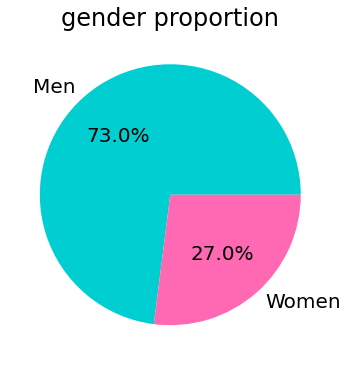

In [17]:
gender_proportion_plot()

### V1- My observations:
>as we can see here in the plot above men have higher proportion than Women

#### Q2 - **How meny Athlete from Athens city got Gold medal in Tennis ?**

In [18]:
def Gold_players_count(city,sport,color):
    """This function plot a histogram that shows How meny Athlete got Gold in a specific spot and city"""
    data = df.query(f"City == '{city}' and Sport == '{sport}' and Medal_Rank == 1")['Athlete']
    plt.figure(figsize=(10,7))
    plt.rcParams['font.size'] = 10
    plt.xticks(rotation=15, ha='right')
    plt.title(F"Gold medals of {city} city",fontsize = 20)
    plt.xlabel("Athlete",fontsize = 15)
    plt.ylabel("Gold Medal Frequency",fontsize = 15)
    plt.hist(data,edgecolor='black',color = color)
    

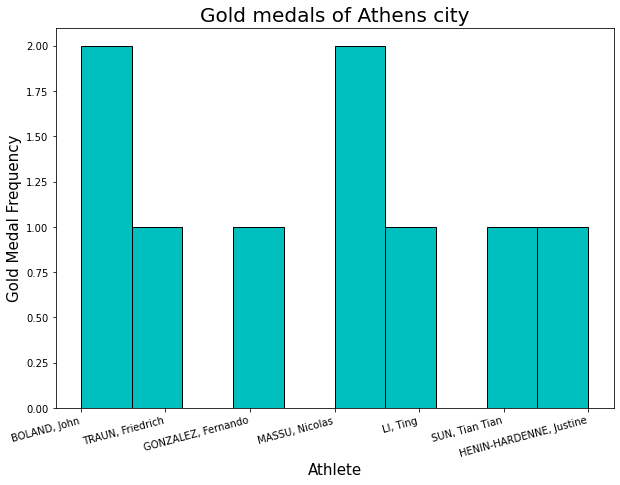

In [19]:
Gold_players_count('Athens','Tennis',"c")

### V2- My observations:
>This plot shows as 7 players have gold Medal and there is 2 players have 2 gold medals [BOLAND, John]  and [MASSU, Nicolas]

#### Q3 - **How meny Athlete from Paris city got Gold medal in Tennis ?**

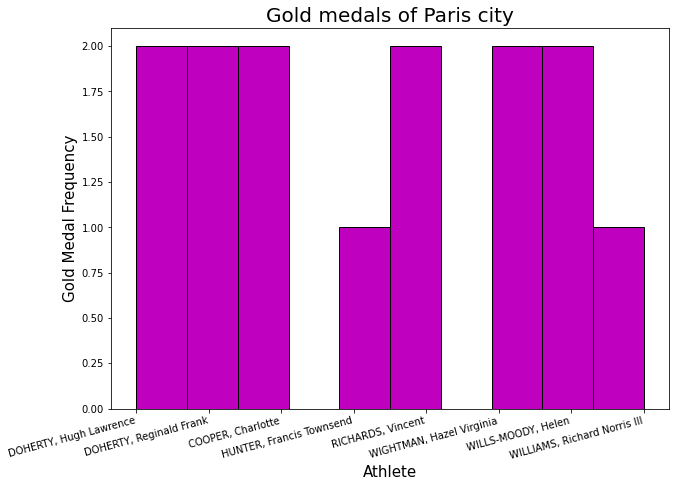

In [20]:
Gold_players_count('Paris','Tennis',"m")

### V3- My observations:
>This plot shows as 8 players have gold Medal and there is 6 players have 2 gold medals (DOHERTY, Hugh Lawrence), (DOHERTY, Reginald Frank), (COOPER, Charlotte), (RICHARDS, Vincent) , (WIGHTMAN, Hazel Virginia) and  (WILLS-MOODY, Helen)


#### Q4 - **How meny Athlete from Sydney city got Gold medal in Tennis ?**

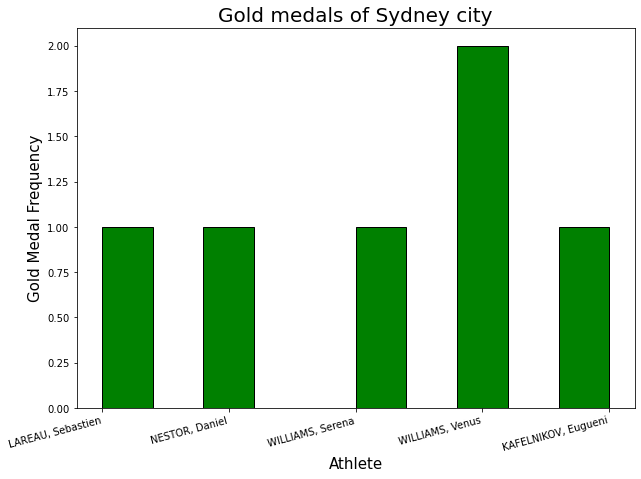

In [21]:
Gold_players_count('Sydney','Tennis',"g")

### V4- My observations:
>For Sydney only 5 Athletes got Gold medal and only one athlete have 2 golden medal (WILLIAMS, Venus) 

- when we compaire ( Athens , Los Angeles , Sydney ) we can see that Los Angeles athletes have more gold medal

#### Q5 - **what is top 10 Cities have Gold medal in all summer games?**

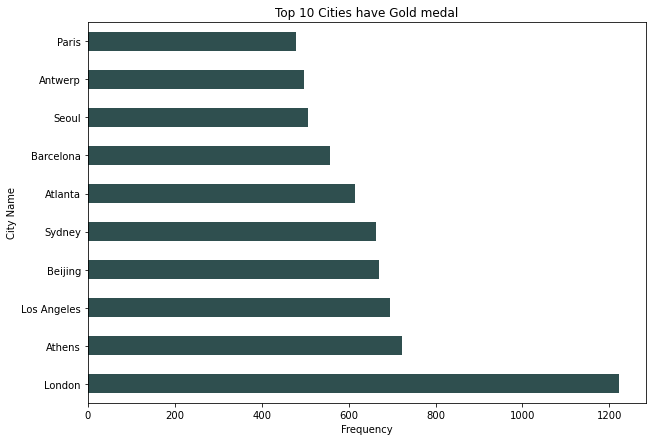

In [22]:
top_Cities = df.query("Medal_Rank == 1")['City'].value_counts()

plt.figure(figsize=(10,7))
top_Cities[:10].sort_values(ascending=False).plot(kind='barh' , color = '#2F4F4F')

plt.title('Top 10 Cities have Gold medal')
plt.xlabel('Frequency')
plt.ylabel('City Name');

### V5- My observations:
>wow we can see here London has more than 1200 gold medal in all summer games <br>
it has the larger number of medals then (Athens ,Los Angeles ,Beijing ,Sydney ,Atlanta, Barcelona, Seoul, Antwerp, Paris)   

#### Q6 - **what is top 10 Cities have Gold medal in Football?**

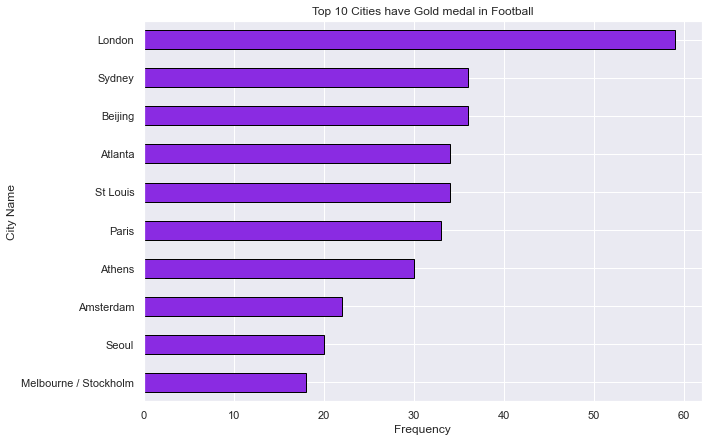

In [43]:
top_Cities = df.query("Medal_Rank == 1 and Sport == 'Football'")['City'].value_counts()
plt.figure(figsize=(10,7))
top_Cities[:10].sort_values().plot(kind='barh' , color = '#8A2BE2',edgecolor='black')

plt.title('Top 10 Cities have Gold medal in Football')
plt.xlabel('Frequency')
plt.ylabel('City Name');

### V6- My observations:
>London is the has the highest number of medals in Football then comes <br>
(Beijing , Sydney , St Louis , Atlanta , Paris , Athens , Amsterdam , Seoul , Melbourne / Stockholm)

#### Q7 - **who are the top 5 greatest gold medal winners, from all summer Olympic Games?**

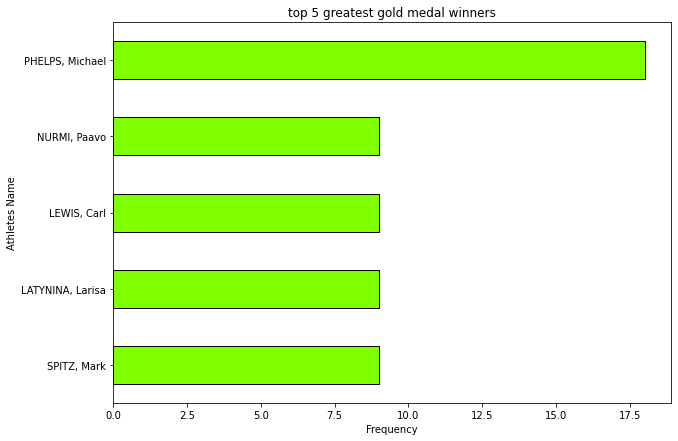

In [24]:
top_Athlete = df.query("Medal_Rank == 1")['Athlete'].value_counts()
plt.figure(figsize=(10,7))
top_Athlete[:5].sort_values().plot(kind='barh' , color = '#7FFF00' , edgecolor='black')

plt.title('top 5 greatest gold medal winners')
plt.xlabel('Frequency')
plt.ylabel('Athletes Name');

### V7- My observations:
>(PHELPS, Michael) have won 18 gold medal in differant games
(SPITZ, Mark) , (LATYNINA, Larisa) , (LEWIS, Carl) , (NURMI, Paavo) all of them won 9 gold medals       

#### Q8 - **What is the top 5 participating country in the Summer Olympics?**

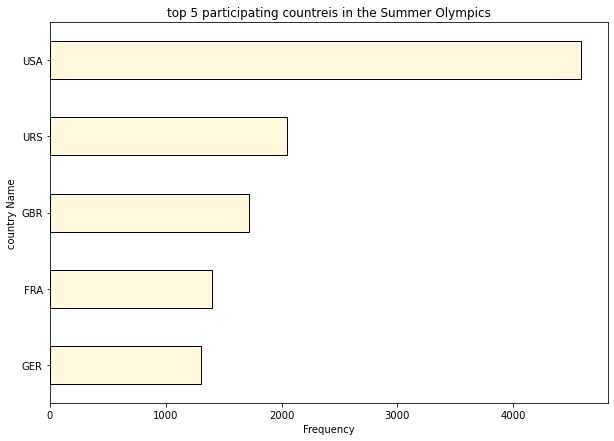

In [25]:
most_participating_countries = df['Country'].value_counts()
plt.figure(figsize=(10,7))
most_participating_countries[:5].sort_values().plot(kind='barh' , color = '#FFF8DC' , edgecolor='black')

plt.title('top 5 participating countreis in the Summer Olympics')
plt.xlabel('Frequency')
plt.ylabel('country Name');

### V8- My observations:
>we can see that USA more than 4000 participating in summer games      

#### Q9 - **What is the top 5 presented events in the Summer Olympics?**

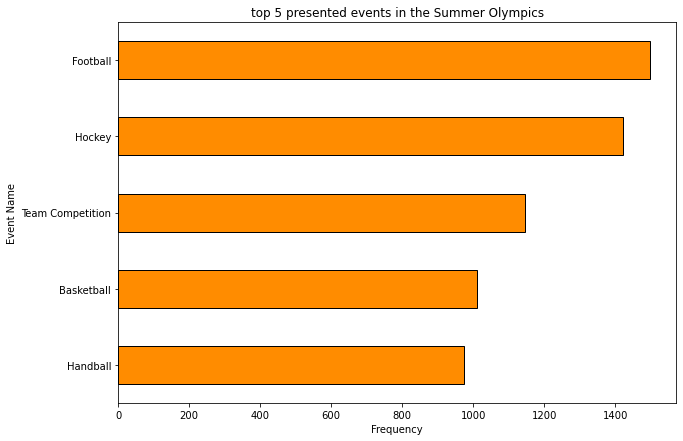

In [26]:
most_presented_event = df['Event'].value_counts()
plt.figure(figsize=(10,7))
most_presented_event[:5].sort_values().plot(kind='barh' , color = '#FF8C00' , edgecolor='black')

plt.title('top 5 presented events in the Summer Olympics')
plt.xlabel('Frequency')
plt.ylabel('Event Name');

### V9- My observations:
>we can see that FootBall has presented more than 1400 time in summer games      

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the categorical variables has many values, different sport names, athletes, events and countries, so i had to took the top 10 from each variable and performed observation on each one of them

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> may be some unsual points happended when discovering `Country column`, because this column has 4 Nan values, i don't think i can perform any transformation on such an importnat aspect of my dataset

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Q10 - **what is Top 5 Countries and Their Most Common medals?**

In [27]:
def Most_Common_medals(column,n,title):
    sb.set(font_scale=2)
    sb.set(rc={'figure.figsize':(12,6)})
    sb.countplot(x=column,data=df,hue='Medal',order=df[column].value_counts()[:n].index)
    plt.title(title)

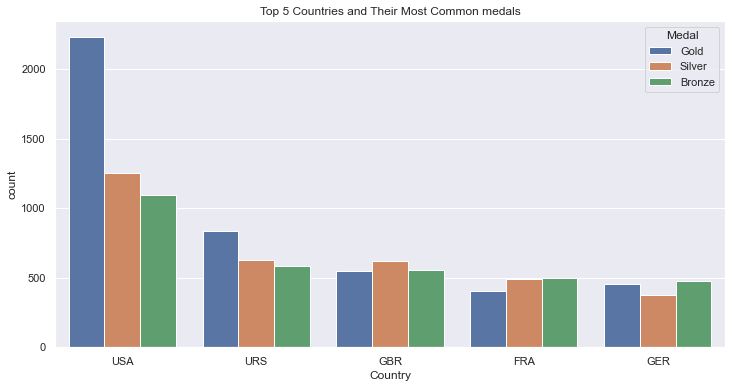

In [28]:
Most_Common_medals("Country",5,'Top 5 Countries and Their Most Common medals')

### V10- My observations:
>- USA has higher number of all medals   
>- URS in the 2ed place
>- GBR in the 3ed place
>- FRA in the 4th place
>- GER in the 5ed place

#### Q11 - **Which gender has Most Common medals?**

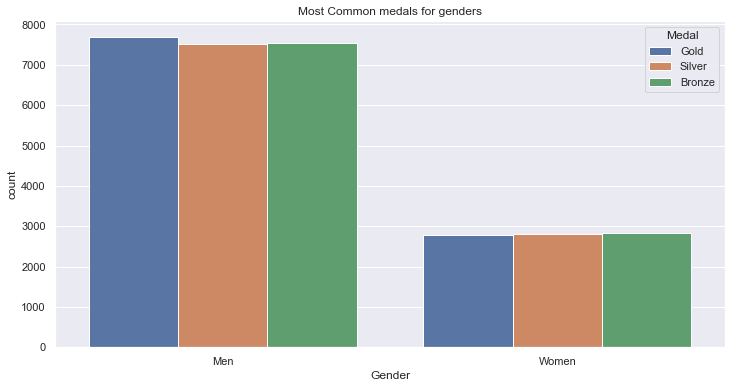

In [29]:
Most_Common_medals("Gender",5,'Most Common medals for genders')

### V11- My observations:
>- Men have more number of medals than Women

#### Q12 - **what is top 5 Events and Their Most Common medals?**

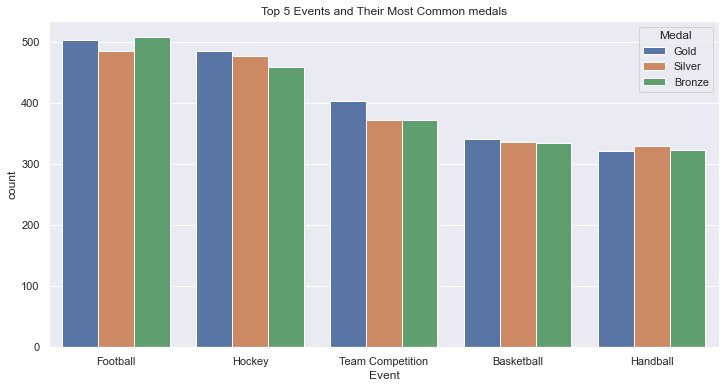

In [30]:
Most_Common_medals("Event",5,'Top 5 Events and Their Most Common medals')

### V12- My observations:
> For multiple analysis we have seen football always have higher number of medals
but here aproximatly bronze medal is higher than gold medal

> for Hockey gold medal is the most common medal

> for Team Competition gold medal is the most common medal

> for basketball gold medal is the most common medal

> for handball silver medal is the most common medal

#### Q13 - **what is top 5 Athelets and Their Most Common medals?**

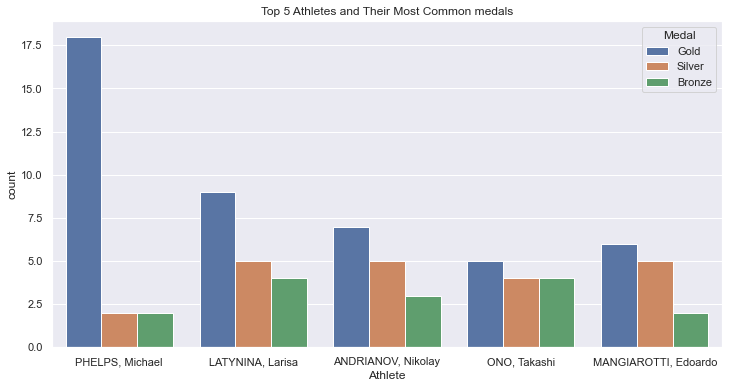

In [31]:
Most_Common_medals("Athlete",5,'Top 5 Athletes and Their Most Common medals')

### V13- My observations:
>- (PHELPS, Michael) is a shiny star here he got more than 17 gold medals in the Olympics
>- Then we see (LATNINA, Larisa) has mor than 7 gold medals
>- (ANDRIANOV, Nikolay) , (ONO, Takashi) and (MANGIAROTTI, Edoardo) the gold medal is the most common medal between all medals

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>- when we look to 10th Visualization we can see that *USA* Has the highest number of Gold medals
>- but *FRA* no has the lowest between the five
>- also the athletes (PHELPS, Michael) has the highest number of gold medals
>- but (ONO, Takashi) have the lowest

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>- USA as country and thier Athletes both have most common dold medals,unlike germany as a country, gold medals are the most common medal but their national won silver medals the most

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Q14 - **What is the most city male and female has higher number of gold medal?**

<Figure size 864x576 with 0 Axes>

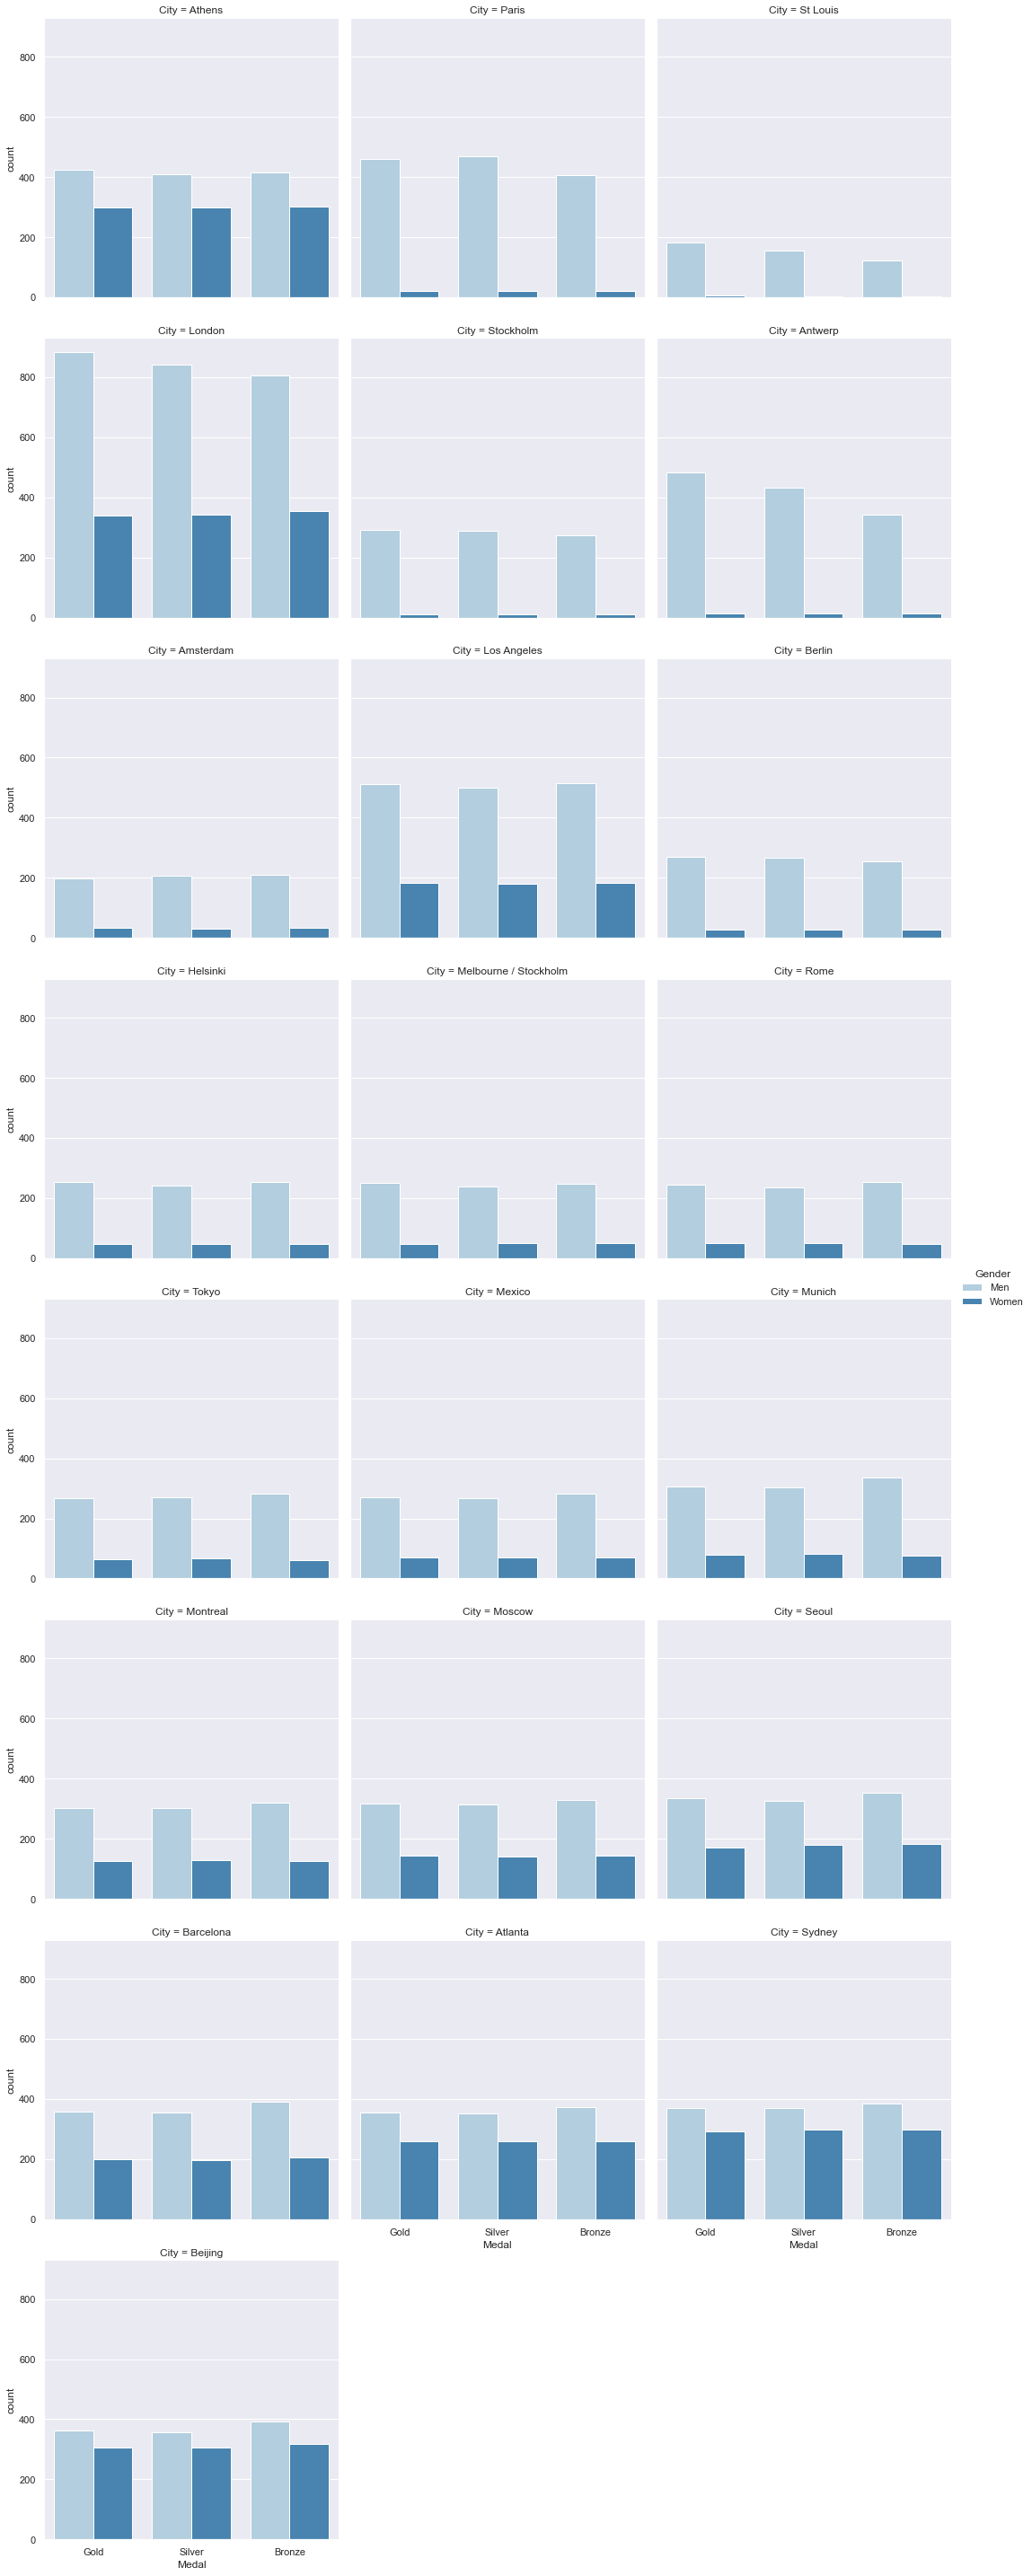

In [32]:
plt.figure(figsize = [12, 8]);
sb.catplot(x = 'Medal', hue = 'Gender', col = 'City', data = df, kind = 'count', palette = 'Blues', col_wrap = 3);  

### V14- My observations:
>- Between all of these cities we can see london's males and Females
have the highest number of gold medals

#### Q15 - **which gender got more medals over the years?**

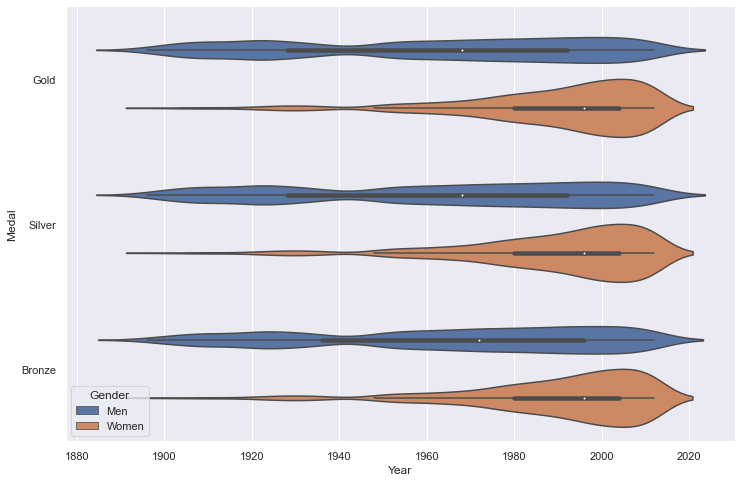

In [33]:
data = df.query("Year == 2012")
plt.figure(figsize = [12, 8])
sb.violinplot(data=df, x='Year', y='Medal', hue='Gender');

### V15- My observations:
>- This plot shows as men got more medals over the years

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Every time when we see the comparisen between men and women always men have more medals

### Were there any interesting or surprising interactions between features?

>the interesting interactions between features in v14 we saw a lot of changes in the number of medals

## Conclusions
>I was very excited to see who are the athletes who got the highest number of gold medals, also 
which **country** and **city** got the highest number of gold medals we saw *USA got this title*, I have done several Visualizations
that helps me to find the answer.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

